## chapter introduction by Halil Hasmer

# Python For Traders and Investors - Chapter 4

## 4.1 Handling date and time

In [1143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Datetime handling is really important for quantitative trading applications. We often deal with different time zones, daylight saving, leap days and so on. This can really be a problem for our research. Let's see how we can deal with this effectively.

In [1144]:
from datetime import datetime, timedelta

In [1145]:
# last part is microseconds

datetime.utcnow()

datetime.datetime(2022, 5, 7, 13, 2, 47, 708768)

In [1146]:
datetime.now()

datetime.datetime(2022, 5, 7, 16, 2, 47, 750665)

In [1147]:
# timedelta takes the parameter as a day value

datetime.now() + timedelta(days=61)

datetime.datetime(2022, 7, 7, 16, 2, 47, 789523)

We get the time and date exactly 61 days from now. What about 61 days, 3 hours and 12 minutes?

In [1148]:
new_time = datetime.now() + timedelta(61,3600*3+60*12)
print(f"new_time: {new_time} \t {str(new_time)}")

# an easier way to the eye by myself
my_newtime = datetime.now() + timedelta(days=61, hours=3, minutes=12)
print(f"my_newtime: {my_newtime} \t {str(my_newtime)}")

new_time: 2022-07-07 19:14:47.829454 	 2022-07-07 19:14:47.829454
my_newtime: 2022-07-07 19:14:47.830441 	 2022-07-07 19:14:47.830441


In [1149]:
new_time

datetime.datetime(2022, 7, 7, 19, 14, 47, 829454)

In [1150]:
# Converting to string
str(new_time)

'2022-07-07 19:14:47.829454'

Here, we also turned the *datetime object* into a string for better readability. In backtests we often start with a date string and then have to some datetime arithmetic. Previously we read a .csv file line-by-line:

In [1151]:
dates = []
fid = open('output.csv')
fid.readline() 
for i in fid:
    line = i.strip().split(',')
    dates.append(line[0])

In [1152]:
dates[:3]

['2017-05-08', '2017-05-09', '2017-05-10']

Converting date strings to datetime objects:

In [1153]:
from dateutil.parser import parse

In [1154]:
# This gives us the datetime object of the first date in our price data file
parse(dates[0])

datetime.datetime(2017, 5, 8, 0, 0)

In [1155]:
# But if we parse the whole 'dates' list:
# parse(dates)
# output: TypeError: Parser must be a string or character stream, not list
# The above code will cause error. See next few lines for another method.

Another method is to use the to_datetime() function from pandas:

In [1156]:
pd.to_datetime(dates[0])

Timestamp('2017-05-08 00:00:00')

In [1157]:
## since its a bunch of strings, it makes sense to pass them to pandas

In [1158]:
pd.to_datetime(dates)

DatetimeIndex(['2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11',
               '2017-05-12', '2017-05-15', '2017-05-16', '2017-05-17',
               '2017-05-18', '2017-05-19',
               ...
               '2022-04-22', '2022-04-25', '2022-04-26', '2022-04-27',
               '2022-04-28', '2022-04-29', '2022-05-02', '2022-05-03',
               '2022-05-04', '2022-05-05'],
              dtype='datetime64[ns]', length=1259, freq=None)

## 4.2 Converting timezones

Let's calculate the time period that is covered by our data file:

In [1159]:
dates

['2017-05-08',
 '2017-05-09',
 '2017-05-10',
 '2017-05-11',
 '2017-05-12',
 '2017-05-15',
 '2017-05-16',
 '2017-05-17',
 '2017-05-18',
 '2017-05-19',
 '2017-05-22',
 '2017-05-23',
 '2017-05-24',
 '2017-05-25',
 '2017-05-26',
 '2017-05-30',
 '2017-05-31',
 '2017-06-01',
 '2017-06-02',
 '2017-06-05',
 '2017-06-06',
 '2017-06-07',
 '2017-06-08',
 '2017-06-09',
 '2017-06-12',
 '2017-06-13',
 '2017-06-14',
 '2017-06-15',
 '2017-06-16',
 '2017-06-19',
 '2017-06-20',
 '2017-06-21',
 '2017-06-22',
 '2017-06-23',
 '2017-06-26',
 '2017-06-27',
 '2017-06-28',
 '2017-06-29',
 '2017-06-30',
 '2017-07-03',
 '2017-07-05',
 '2017-07-06',
 '2017-07-07',
 '2017-07-10',
 '2017-07-11',
 '2017-07-12',
 '2017-07-13',
 '2017-07-14',
 '2017-07-17',
 '2017-07-18',
 '2017-07-19',
 '2017-07-20',
 '2017-07-21',
 '2017-07-24',
 '2017-07-25',
 '2017-07-26',
 '2017-07-27',
 '2017-07-28',
 '2017-07-31',
 '2017-08-01',
 '2017-08-02',
 '2017-08-03',
 '2017-08-04',
 '2017-08-07',
 '2017-08-08',
 '2017-08-09',
 '2017-08-

In [1160]:
dates[0]

'2017-05-08'

In [1161]:
dates[-1]

'2022-05-05'

In [1162]:
(parse(dates[-1]) - parse(dates[0]))

datetime.timedelta(days=1823)

Timedelta objects specify days and seconds. The time period in our file is 3662 days. We can also output that number as an integer for further use:

In [1163]:
# The exact number of days
(parse(dates[-1]) - parse(dates[0])).days

1823

In [1164]:
(parse(dates[-1]) - parse(dates[0])).seconds

0

In [1165]:
# Let's go a bit crazy:
(parse(dates[-1]) - parse(dates[0])).total_seconds()

157507200.0

There are other ways to generate a datetime object. Sometimes we need them as our parser is quite slow because it has to figure out what format our date string is in. Alternatively, we can split up our date string into integer numbers and feed them into datetime:

In [1166]:
dates[0]

'2017-05-08'

In [1167]:
# Much faster but more complicated than the dateutil parser.
ns = dates[0].split('-')
datetime(year=int(ns[0]),month=int(ns[1]),day=int(ns[2]))

datetime.datetime(2017, 5, 8, 0, 0)

If we deal with multiple international exchanges it is always a good idea to convert all the times into universal time (UTC), which is the Greenwich mean time (London) without the daylight saving.

In [1168]:
ns

['2017', '05', '08']

In [1169]:
import pytz

In [1170]:
datetime(year=int(ns[0]), month=int(ns[1]), day=int(ns[2]), tzinfo=pytz.utc)

datetime.datetime(2017, 5, 8, 0, 0, tzinfo=<UTC>)

In [1171]:
datetime.now(pytz.timezone('UTC'))

datetime.datetime(2022, 5, 7, 13, 2, 48, 872683, tzinfo=<UTC>)

In [1172]:
datetime.now()

datetime.datetime(2022, 5, 7, 16, 2, 48, 909620)

In [1173]:
pytz.all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

To be honest, the standard timezone handling in Python is pretty average. There is a package called delorean (remember the movie "Back to the Future") that makes it much simpler.

http://delorean.readthedocs.io/en/latest/quickstart.html

In [1174]:
from delorean import Delorean

In [1175]:
d1 = Delorean(datetime(2019, 12, 1), timezone='Australia/Sydney')
d1

Delorean(datetime=datetime.datetime(2019, 12, 1, 0, 0), timezone='Australia/Sydney')

In [1176]:
str(d1.datetime)

'2019-12-01 00:00:00+11:00'

We now look at what time it is currently in the US/Eastern timezone

In [1177]:
# Convert the datetime to US/Eastern timezone
d1 = d1.shift("US/Eastern")

# Convert to string 
str(d1.datetime)

'2019-11-30 08:00:00-05:00'

In [1178]:
d1

Delorean(datetime=datetime.datetime(2019, 11, 30, 8, 0), timezone='US/Eastern')

If we subtract the different times from the two timezones we should get zero time difference:

In [1179]:
# Time arithmetic: difference between different time zones
d1.datetime - d1.shift("US/Eastern").datetime

datetime.timedelta(0)

For very fast applications it is recommended to use the so-called __Unix timestamp__. Linux time is the number of seconds since the first of Jan 1970 in UTC. This is just a float number and much faster to process than a time stamp, but less descriptive. We simply get Linux time like this:

In [1180]:
str(d1.datetime)

'2019-11-30 08:00:00-05:00'

In [1181]:
d1.epoch

1575118800.0

In [1182]:
timestmp = d1.epoch

In [1183]:
timestmp = d1.epoch
timestmp

1575118800.0

In [1184]:
datetime.fromtimestamp(timestmp)

datetime.datetime(2019, 11, 30, 16, 0)

In [1185]:
now = datetime.now()
now

datetime.datetime(2022, 5, 7, 16, 2, 49, 416218)

In [1186]:
timestamp_now = datetime.timestamp(now)
timestamp_now

1651928569.416218

In [1187]:
# .fromtimestamp to convert the time you get from binance etc... .timestamp(now) to send a request back to the binance api

# naive datetime object is a datetime object where there is no timezone selected. Instead we shold always work with aware datetime objects
# as they can locate itself in time and represents a specific moment in time that is not open to interpretation. 

The choice of formats always depends on the individual application.

## 4.3 Calculating returns

In [1188]:
import pandas as pd
import numpy as np

In [1189]:
data = pd.read_csv('output.csv', index_col=0, parse_dates=True)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-08,38.424999,37.257500,37.257500,38.252499,195009600.0,36.116478
2017-05-09,38.720001,38.362499,38.467499,38.497501,156521600.0,36.347801
2017-05-10,38.485001,38.027500,38.407501,38.314999,103222800.0,36.175488
2017-05-11,38.517502,38.077499,38.112499,38.487499,109020400.0,36.488346
2017-05-12,39.105000,38.667500,38.674999,39.025002,130108000.0,36.997929


# Important note for self

Last chapter, I go through all those codeblocks to calculate pct_change but all this time there was a function to do just that... **shame on me**.

In [1190]:
data['%_return'] = data['Close'].pct_change()

In [1191]:
# let's see how it looks
data.tail()

,High,Low,Open,Close,Volume,Adj Close,%_return
Date,,,,,,,
2022-04-29,166.199997,157.250000,161.839996,157.649994,131587100.0,157.649994,-0.036605
2022-05-02,158.229996,153.270004,156.710007,157.960007,123055300.0,157.960007,0.001966
2022-05-03,160.710007,156.320007,158.149994,159.479996,88966500.0,159.479996,0.009623
2022-05-04,166.479996,159.259995,159.669998,166.020004,108256500.0,166.020004,0.041008
2022-05-05,164.080002,154.949997,163.850006,156.770004,129838200.0,156.770004,-0.055716


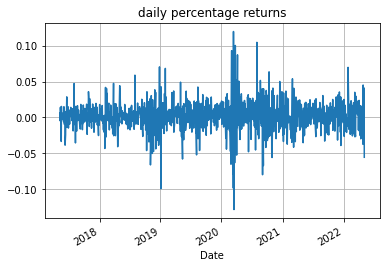

In [1192]:
data['%_return'].plot()
plt.title('daily percentage returns')
plt.grid()
plt.show()

In [1193]:
data['%_return'].head()

Date
2017-05-08         NaN
2017-05-09    0.006405
2017-05-10   -0.004741
2017-05-11    0.004502
2017-05-12    0.013966
Name: %_return, dtype: float64

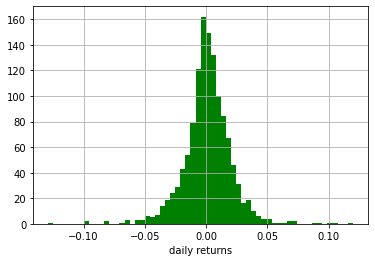

In [1194]:
plt.hist(data['%_return'].dropna(), bins=60, color='g')
plt.grid()
plt.xlabel('daily returns')
plt.show()

In [1195]:
# downsample to monthly data

data['Close'].resample('M').last().head()

Date
2017-05-31    38.189999
2017-06-30    36.005001
2017-07-31    37.182499
2017-08-31    41.000000
2017-09-30    38.529999
Freq: M, Name: Close, dtype: float64

#### Monthly returns

In [1196]:
# ffill() means forward fill. this will replace invalid numbers and NaN values with the last valid value. 
# i.e. the assumption is if there is an unvalid value, the price has not changed
# there is a bfill() backfill function as well. but using it would cause getting values from the future aka look-ahead bias
# order of chaining is important. 

data['Close'].resample('M').ffill().head()

Date
2017-05-31    38.189999
2017-06-30    36.005001
2017-07-31    37.182499
2017-08-31    41.000000
2017-09-30    38.529999
Freq: M, Name: Close, dtype: float64

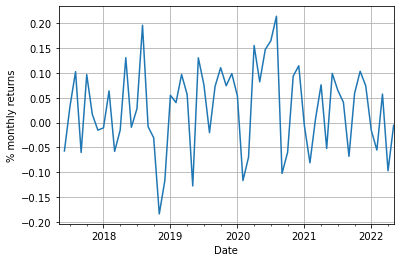

In [1197]:
data['Close'].resample('M').ffill().pct_change().plot()
plt.ylabel('% monthly returns')
plt.grid()
plt.show()

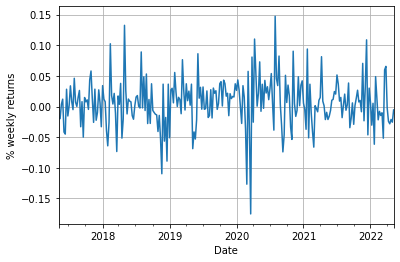

In [1198]:
# Weekly returns
data['Close'].resample('W').ffill().pct_change().plot()
plt.ylabel('% weekly returns')
plt.grid()
plt.show()

#### Cumulative returns

cumprod(): Return cumulative product over a DataFrame or Series axis

In [1199]:
# add 1 bc product wo it makes no sense

data['cum_return'] = (data['%_return'] + 1).cumprod()

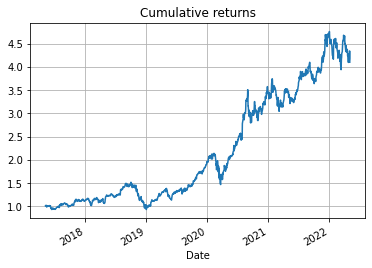

In [1200]:
data['cum_return'].plot()
plt.title('Cumulative returns')
plt.grid()
plt.show()

## 4.4 Calculating volatility

In [1201]:
# volatility is also important to determine bollinger bands
# mathematically; the volatility is the rolling std dev of pct_returns of our positions
# the higher the volatility, the riskier it is for our bot

In [1202]:
data.drop(['cum_return'], axis=1, inplace=True)

In [1203]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,%_return
Date,,,,,,,
2017-05-08,38.424999,37.257500,37.257500,38.252499,195009600.0,36.116478,NaN
2017-05-09,38.720001,38.362499,38.467499,38.497501,156521600.0,36.347801,0.006405
2017-05-10,38.485001,38.027500,38.407501,38.314999,103222800.0,36.175488,-0.004741
2017-05-11,38.517502,38.077499,38.112499,38.487499,109020400.0,36.488346,0.004502
2017-05-12,39.105000,38.667500,38.674999,39.025002,130108000.0,36.997929,0.013966


In [1204]:
# Apply a rolling window of 10
data['volatility'] = data['%_return'].rolling(10).std()

In [1205]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,%_return,volatility
Date,,,,,,,,
2022-04-29,166.199997,157.250000,161.839996,157.649994,131587100.0,157.649994,-0.036605,0.024994
2022-05-02,158.229996,153.270004,156.710007,157.960007,123055300.0,157.960007,0.001966,0.025061
2022-05-03,160.710007,156.320007,158.149994,159.479996,88966500.0,159.479996,0.009623,0.024736
2022-05-04,166.479996,159.259995,159.669998,166.020004,108256500.0,166.020004,0.041008,0.028663
2022-05-05,164.080002,154.949997,163.850006,156.770004,129838200.0,156.770004,-0.055716,0.033632


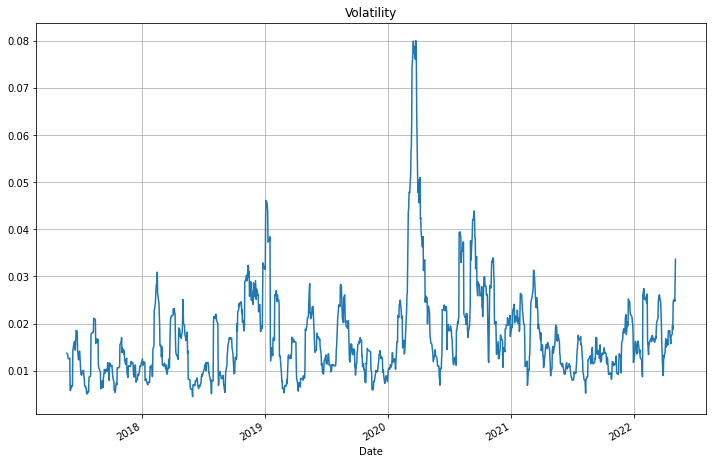

In [1206]:
plt.figure(figsize=(12,8))
data['volatility'].plot()
plt.title('Volatility')
plt.grid()
plt.show()

In [1207]:
import pandas_datareader

In [1208]:
# Download data for AMZN, GOOG, COST and S&P500
mydata = pandas_datareader.get_data_yahoo(['AMZN', 'GOOG', 'COST', '^GSPC'])

In [1209]:
# multi-indexed dataframe

mydata.head(2)

Attributes   Adj Close                                            Close  \
Symbols           AMZN        GOOG        COST        ^GSPC        AMZN   
Date                                                                      
2017-05-08  949.039978  934.299988  160.274323  2399.379883  949.039978   
2017-05-09  952.820007  932.169983  160.311462  2396.919922  952.820007   

Attributes                                             High              ...  \
Symbols           GOOG        COST        ^GSPC        AMZN        GOOG  ...   
Date                                                                     ...   
2017-05-08  934.299988  172.639999  2399.379883  949.049988  936.924988  ...   
2017-05-09  932.169983  172.679993  2396.919922  957.890015  937.500000  ...   

Attributes         Low                     Open                          \
Symbols           COST        ^GSPC        AMZN        GOOG        COST   
Date                                                                      
2017-05-08  171.600006  2393.919922  940.950012  926.119995  174.660004   
2017-05-09  172.309998  2392.439941  952.799988  936.950012  173.610001   

Attributes                  Volume                                      
Symbols           ^GSPC       AMZN       GOOG       COST         ^GSPC  
Date                                                                    
2017-05-08  2399.939941  3415700.0  1329800.0  3538000.0  3.429440e+09  
2017-05-09  2401.580078  3262100.0  1581800.0  2662100.0  3.653590e+09  

[2 rows x 24 columns]

In [1210]:
mydata.columns

MultiIndex([('Adj Close',  'AMZN'),
            ('Adj Close',  'GOOG'),
            ('Adj Close',  'COST'),
            ('Adj Close', '^GSPC'),
            (    'Close',  'AMZN'),
            (    'Close',  'GOOG'),
            (    'Close',  'COST'),
            (    'Close', '^GSPC'),
            (     'High',  'AMZN'),
            (     'High',  'GOOG'),
            (     'High',  'COST'),
            (     'High', '^GSPC'),
            (      'Low',  'AMZN'),
            (      'Low',  'GOOG'),
            (      'Low',  'COST'),
            (      'Low', '^GSPC'),
            (     'Open',  'AMZN'),
            (     'Open',  'GOOG'),
            (     'Open',  'COST'),
            (     'Open', '^GSPC'),
            (   'Volume',  'AMZN'),
            (   'Volume',  'GOOG'),
            (   'Volume',  'COST'),
            (   'Volume', '^GSPC')],
           names=['Attributes', 'Symbols'])

In [1211]:
df_close = mydata['Adj Close']
df_close.head()

Symbols,AMZN,GOOG,COST,^GSPC
Date,,,,
2017-05-08,949.039978,934.299988,160.274323,2399.379883
2017-05-09,952.820007,932.169983,160.311462,2396.919922
2017-05-10,948.950012,928.780029,159.538666,2399.629883
2017-05-11,947.619995,930.599976,159.454849,2394.439941
2017-05-12,961.349976,932.219971,159.101044,2390.899902


In [1212]:
# Apply pct_change, and then 10-period moving window standard deviation
volatility = df_close.pct_change().rolling(10).std()

In [1213]:
volatility.tail()

Symbols,AMZN,GOOG,COST,^GSPC
Date,,,,
2022-05-02,0.052282,0.031549,0.024146,0.020418
2022-05-03,0.049276,0.030575,0.021985,0.019395
2022-05-04,0.050542,0.033777,0.024482,0.022551
2022-05-05,0.053484,0.035966,0.027501,0.024595
2022-05-06,0.053526,0.033687,0.026998,0.023335


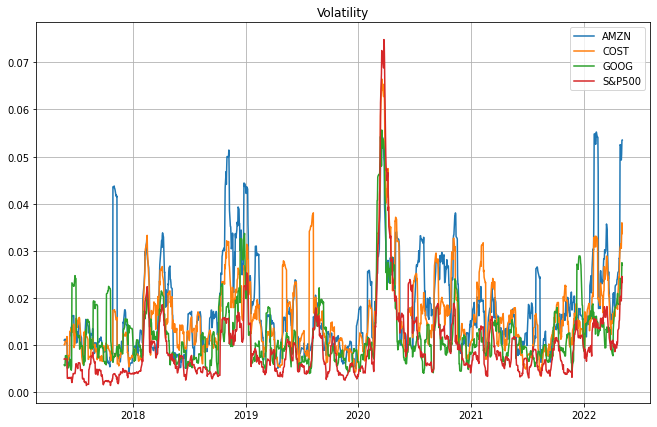

In [1214]:
fig = plt.figure(figsize=(11,7))
plt.plot(volatility)
plt.legend(['AMZN', 'COST', 'GOOG', 'S&P500'])
plt.grid()
plt.title('Volatility')
plt.show()

__Annualised volatility__

In [1215]:
# Annualised volatility for daily data
# mathematically, volatility increases with the sqrt of time
ann_vola = volatility*np.sqrt(252)

In [1216]:
# Annualised volatility for hourly data
trading_hrs = 8
ann_vola = volatility*np.sqrt(252*trading_hrs)

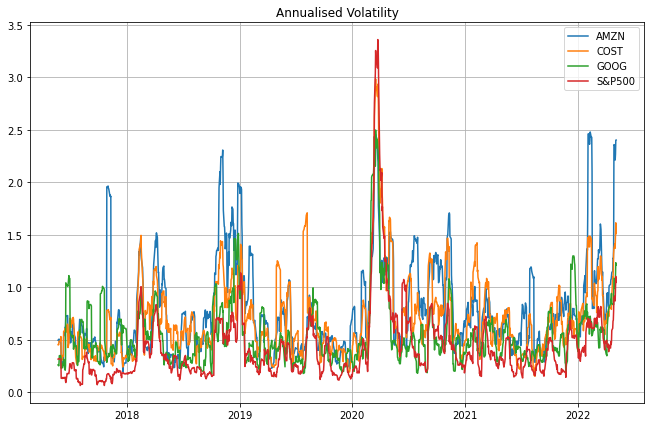

In [1217]:
fig = plt.figure(figsize=(11,7))
plt.plot(ann_vola)
plt.legend(['AMZN', 'COST', 'GOOG', 'S&P500'])
plt.grid()
plt.title('Annualised Volatility')
plt.show()

## 4.5 Correlations in the market

In [1218]:
# less correlated asses provide us to spread our portfolio safely, ie diversification
# correlation differs between -1 and 1... 0 means no correlation in between

In [1219]:
mydata1 = pandas_datareader.get_data_yahoo(['GLD', 'XOM', 'LUV', 'DAL',  'AMZN', '^GSPC'])

In [1220]:
mydata1.head()

Attributes   Adj Close                                               \
Symbols            GLD        XOM        LUV        DAL        AMZN   
Date                                                                  
2017-05-08  116.750000  63.709515  55.523365  45.006397  949.039978   
2017-05-09  116.050003  63.263721  56.296127  45.971088  952.820007   
2017-05-10  116.040001  63.550800  56.383068  46.351398  948.950012   
2017-05-11  116.500000  64.093880  56.112595  46.091671  947.619995   
2017-05-12  116.830002  64.047340  55.272221  45.442360  961.349976   

Attributes                    Close                                   ...  \
Symbols           ^GSPC         GLD        XOM        LUV        DAL  ...   
Date                                                                  ...   
2017-05-08  2399.379883  116.750000  82.889999  57.480000  48.520000  ...   
2017-05-09  2396.919922  116.050003  82.309998  58.279999  49.560001  ...   
2017-05-10  2399.629883  116.040001  81.910004  58.369999  49.970001  ...   
2017-05-11  2394.439941  116.500000  82.610001  58.090000  49.689999  ...   
2017-05-12  2390.899902  116.830002  82.550003  57.220001  48.990002  ...   

Attributes       Open                                         Volume  \
Symbols           LUV        DAL        AMZN        ^GSPC        GLD   
Date                                                                   
2017-05-08  58.500000  48.730000  940.950012  2399.939941  5438400.0   
2017-05-09  57.750000  49.000000  952.799988  2401.580078  6801300.0   
2017-05-10  58.169998  49.349998  953.500000  2396.790039  4290500.0   
2017-05-11  58.200001  50.009998  945.109985  2394.840088  6274400.0   
2017-05-12  57.880001  49.490002  954.500000  2392.439941  5434500.0   

Attributes                                                             
Symbols            XOM        LUV        DAL       AMZN         ^GSPC  
Date                                                                   
2017-05-08   8097100.0  3625200.0  8671600.0  3415700.0  3.429440e+09  
2017-05-09   8647100.0  4467900.0  8759600.0  3262100.0  3.653590e+09  
2017-05-10   9520300.0  5051200.0  7548700.0  2096500.0  3.643530e+09  
2017-05-11  10047300.0  2611100.0  8817400.0  2194100.0  3.727420e+09  
2017-05-12   7480200.0  3069600.0  7180500.0  3625900.0  3.305630e+09  

[5 rows x 36 columns]

In [1221]:
ret = mydata1['Adj Close'].pct_change().dropna()

In [1222]:
ret.head()

Symbols,GLD,XOM,LUV,DAL,AMZN,^GSPC
Date,,,,,,
2017-05-09,-0.005996,-0.006997,0.013918,0.021435,0.003983,-0.001025
2017-05-10,-0.000086,0.004538,0.001544,0.008273,-0.004062,0.001131
2017-05-11,0.003964,0.008546,-0.004797,-0.005603,-0.001402,-0.002163
2017-05-12,0.002833,-0.000726,-0.014977,-0.014087,0.014489,-0.001478
2017-05-15,0.002653,0.003029,0.014156,0.010615,-0.003516,0.004777


In [1223]:
corr = ret.corr()

In [1224]:
corr

Symbols,GLD,XOM,LUV,DAL,AMZN,^GSPC
Symbols,,,,,,
GLD,1.000000,0.019358,-0.022309,-0.029401,0.042066,0.040659
XOM,0.019358,1.000000,0.450370,0.471445,0.197915,0.595084
LUV,-0.022309,0.450370,1.000000,0.817801,0.222477,0.549182
DAL,-0.029401,0.471445,0.817801,1.000000,0.210205,0.550138
AMZN,0.042066,0.197915,0.222477,0.210205,1.000000,0.626883
^GSPC,0.040659,0.595084,0.549182,0.550138,0.626883,1.000000


In [1225]:
import seaborn as sns

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

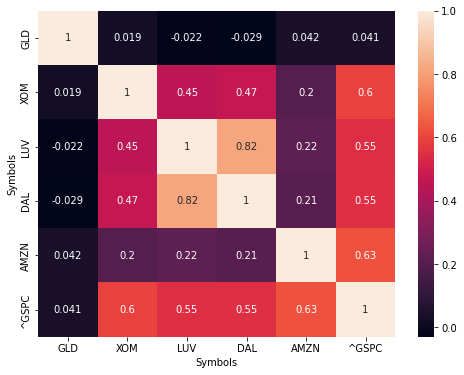

In [1226]:
# plot the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns)

__Note: Correlation changes over time!__

In [1227]:
# Applying a 1-year rolling window to calculate correlation  
# between GLD and XOM
rolling_cor = ret['GLD'].rolling(window=252).corr(ret['XOM'])
rolling_cor.tail()

Date
2022-05-02    0.236194
2022-05-03    0.238021
2022-05-04    0.242916
2022-05-05    0.242880
2022-05-06    0.241121
dtype: float64

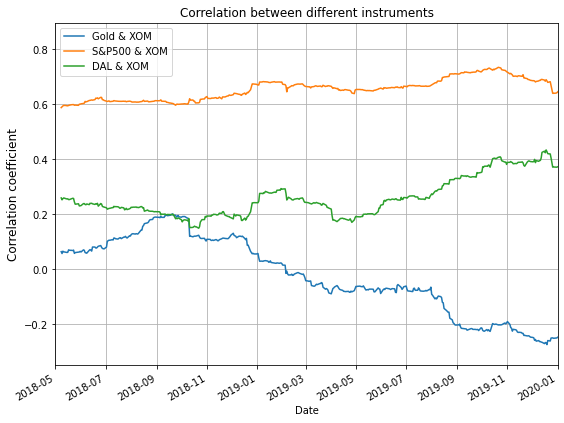

In [1228]:
fig = plt.figure(figsize=(9,7))
ret['GLD'].rolling(window=252).corr(ret['XOM']).plot()
ret['^GSPC'].rolling(window=252).corr(ret['XOM']).plot()
ret['DAL'].rolling(window=252).corr(ret['XOM']).plot()
plt.title('Correlation between different instruments')
plt.xlim(['2018-05', '2020'])
plt.ylabel('Correlation coefficient', fontsize=12)
plt.legend(['Gold & XOM', 'S&P500 & XOM','DAL & XOM'])
plt.grid()
plt.show()

## 4.6 Linear regression analysis

Linear regression is the simplest model. so it probably won't work well in real life

In [1229]:
from sklearn.linear_model import LinearRegression

In [1230]:
ret.head()

Symbols,GLD,XOM,LUV,DAL,AMZN,^GSPC
Date,,,,,,
2017-05-09,-0.005996,-0.006997,0.013918,0.021435,0.003983,-0.001025
2017-05-10,-0.000086,0.004538,0.001544,0.008273,-0.004062,0.001131
2017-05-11,0.003964,0.008546,-0.004797,-0.005603,-0.001402,-0.002163
2017-05-12,0.002833,-0.000726,-0.014977,-0.014087,0.014489,-0.001478
2017-05-15,0.002653,0.003029,0.014156,0.010615,-0.003516,0.004777


In [1231]:
ret['XOM'].values

array([-0.00699728,  0.00453781,  0.00854559, ...,  0.03980037,
       -0.01515812,  0.01528075])

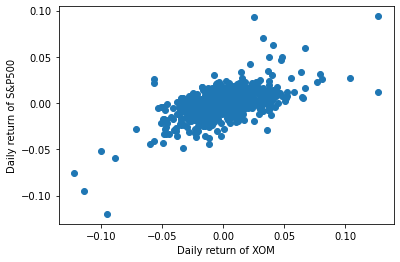

In [1232]:
plt.scatter(ret['XOM'], ret['^GSPC'])
plt.xlabel('Daily return of XOM')
plt.ylabel('Daily return of S&P500')
plt.show()

In [1233]:
x = np.array([ret['XOM']]).T
y = np.array(ret['^GSPC'])

In [1234]:
# Instantiate the LinearRegression model:
lm = LinearRegression()

In [1235]:
lm.fit(x, y)

LinearRegression()

In [1236]:
# Extract the intercept:
lm.intercept_

0.0003263005432540233

In [1237]:
# The slope:
lm.coef_

array([0.37950719])

In [1238]:
# i can add score(r-squared) etc. here that I've learned in 100 days of python course

lm.score(x, y)

0.3541255242401279

In [1239]:
def plot_LR(x, y, a, beta):
    '''function that plots the regression with original points'''
    xx = np.linspace(min(x), max(x),200) 
    yy = a + beta * xx
    
    plt.plot(x, y,'o', ms=2)
    plt.plot(xx,yy)  # the regression line
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.title('y = %f + %f*x'%(a, beta))

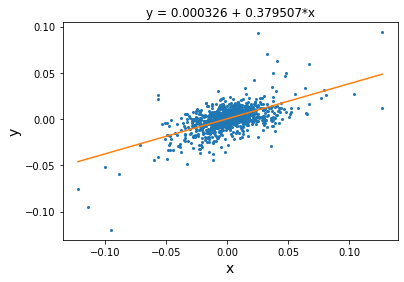

In [1240]:
plot_LR(x, y, lm.intercept_, lm.coef_)

In [1242]:
# I definitely shoud add what I've learned in 100 days of python here...
# while linear regresion is commonly under-fitting the assumptions and predictions, non-linear regression can easilty over-fit the noise and make it even worse.
# the key is to find the optimal route in between and buil a robust model.